In [ ]:
# Name: Ginni Malik
# Roll No.: MIT2023E03290

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np


Downloading Google and Tesla Stock Data

In [ ]:
# Define stock tickers and date range
tickers = ["GOOGL", "TSLA"]
start_date = "2023-12-01"
end_date = "2024-12-01"

# Download data
google_data = yf.download("GOOGL", start=start_date, end=end_date)
tesla_data = yf.download("TSLA", start=start_date, end=end_date)

tesla = tesla_data
google = google_data

# Add a 'Stock' column to differentiate the datasets
tesla["Stock"] = "Tesla"
google["Stock"] = "Google"

# Save the combined data
google_data.to_csv("Google_Stock.csv", index=False)
tesla_data.to_csv("Tesla_Stock.csv", index=False)

# Display a preview
print("Google Data:\n", google_data.head())
print("\nTesla Data:\n", tesla_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Google Data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker           GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                     
2023-12-01  131.383713  131.860001  132.110001  130.669998  131.860001   
2023-12-04  128.803085  129.270004  130.029999  127.900002  129.880005   
2023-12-05  130.516876  130.990005  132.139999  128.250000  128.949997   
2023-12-06  129.550369  130.020004  131.839996  129.880005  131.440002   
2023-12-07  136.435394  136.929993  138.559998  134.699997  135.039993   

Price         Volume   Stock  
Ticker         GOOGL          
Date                          
2023-12-01  31431200  Google  
2023-12-04  36669900  Google  
2023-12-05  27384800  Google  
2023-12-06  23576200  Google  
2023-12-07  56767100  Google  

Tesla Data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSL

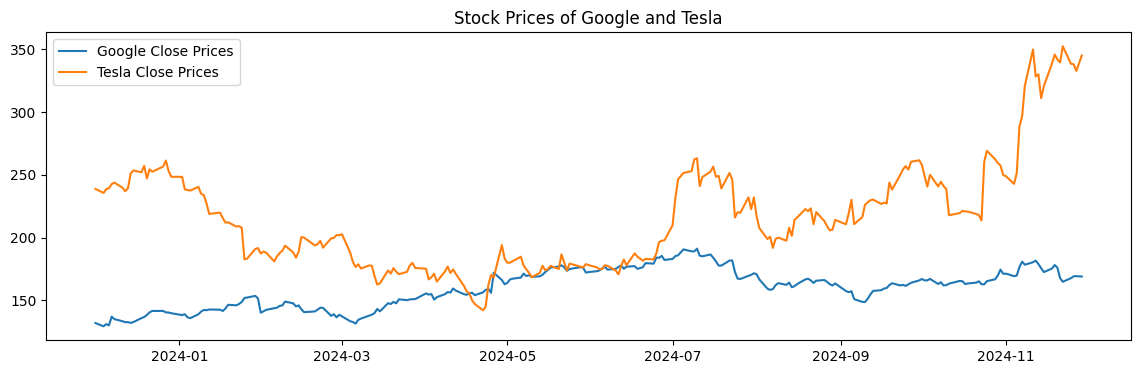

In [ ]:
# Keep only the 'Close' column
google_close = google_data["Close"]
tesla_close = tesla_data["Close"]

# Check for missing values
google_close = google_close.dropna()
tesla_close = tesla_close.dropna()

# Plot the data
plt.figure(figsize=(14, 4))
plt.plot(google_close, label="Google Close Prices")
plt.plot(tesla_close, label="Tesla Close Prices")
plt.title("Stock Prices of Google and Tesla")
plt.legend()
plt.show()


In [ ]:
tesla_data.to_csv("Tesla_data.csv")
google_data.to_csv("Google_data.csv")

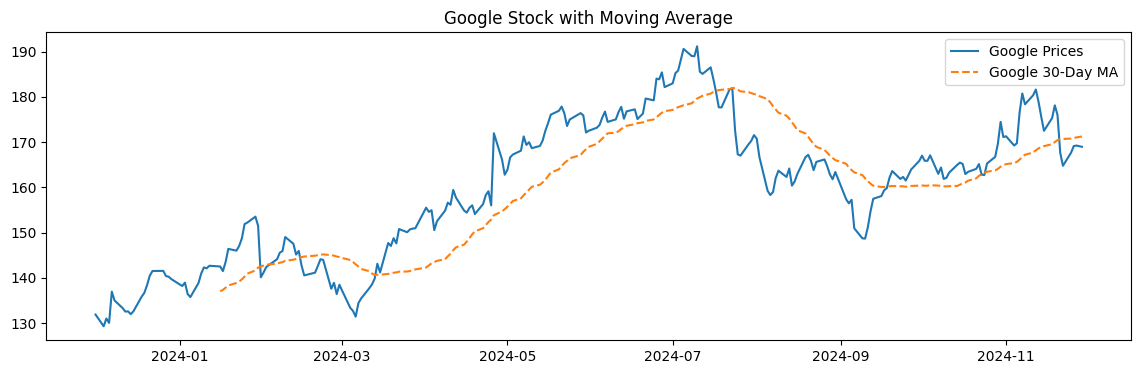

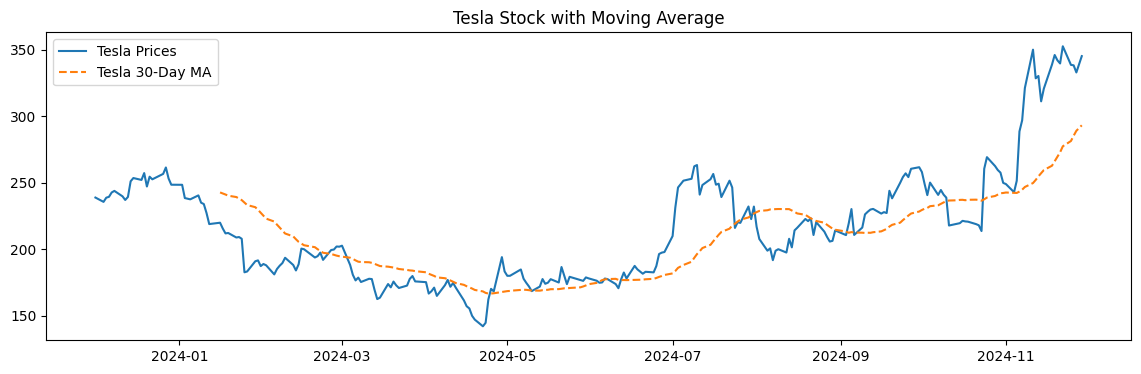

In [ ]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

# Calculate moving averages
google_ma = moving_average(google_close, window_size=30)
tesla_ma = moving_average(tesla_close, window_size=30)

# Plot moving averages
plt.figure(figsize=(14, 4))
plt.plot(google_close, label="Google Prices")
plt.plot(google_ma, label="Google 30-Day MA", linestyle="--")
plt.title("Google Stock with Moving Average")
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(tesla_close, label="Tesla Prices")
plt.plot(tesla_ma, label="Tesla 30-Day MA", linestyle="--")
plt.title("Tesla Stock with Moving Average")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


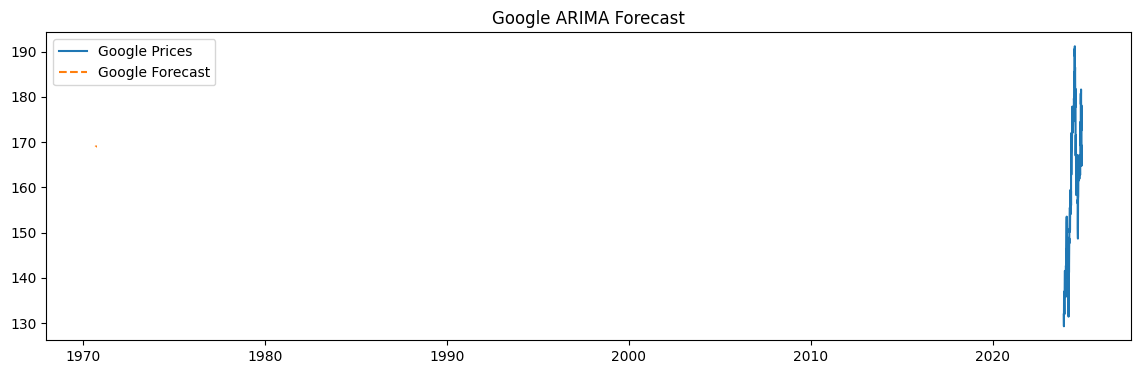

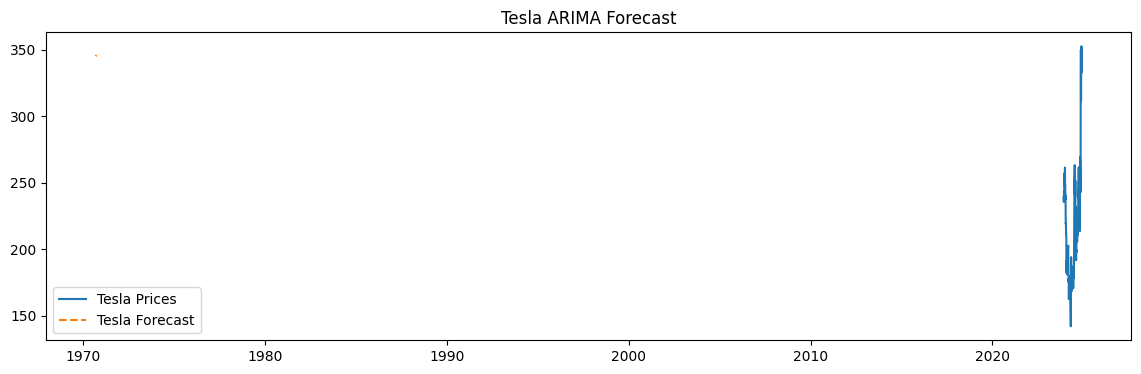

In [ ]:
# ARIMA modeling
def arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Fit ARIMA
google_arima = arima_model(google_close, order=(1, 1, 1))
tesla_arima = arima_model(tesla_close, order=(1, 1, 1))

# Forecast
google_forecast = google_arima.forecast(steps=30)
tesla_forecast = tesla_arima.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(14, 4))
plt.plot(google_close, label="Google Prices")
plt.plot(google_forecast, label="Google Forecast", linestyle="--")
plt.title("Google ARIMA Forecast")
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(tesla_close, label="Tesla Prices")
plt.plot(tesla_forecast, label="Tesla Forecast", linestyle="--")
plt.title("Tesla ARIMA Forecast")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

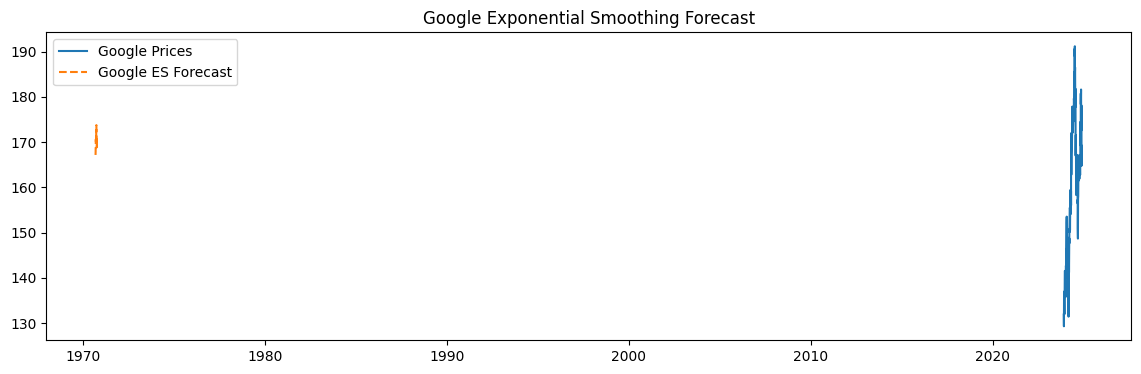

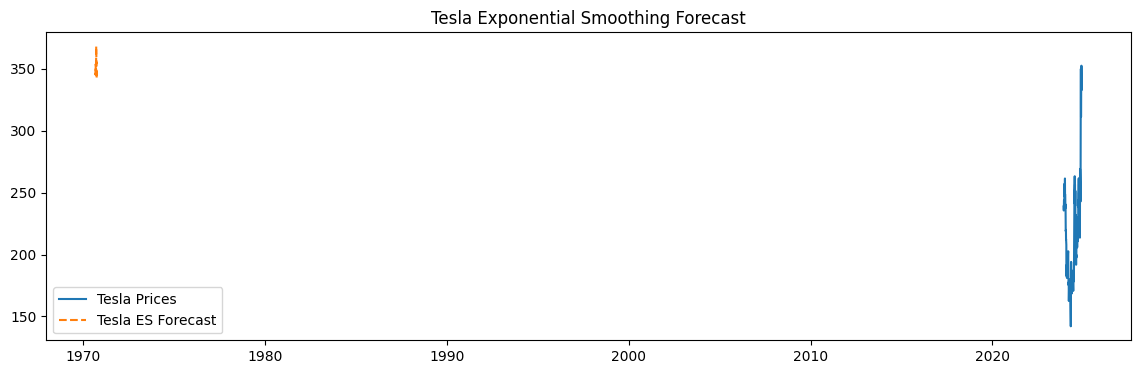

In [ ]:
# Exponential Smoothing
def exponential_smoothing(data, seasonal_periods):
    model = ExponentialSmoothing(data, seasonal="add", seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit

# Fit Exponential Smoothing
google_es = exponential_smoothing(google_close, seasonal_periods=30)
tesla_es = exponential_smoothing(tesla_close, seasonal_periods=30)

# Forecast
google_es_forecast = google_es.forecast(steps=30)
tesla_es_forecast = tesla_es.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(14, 4))
plt.plot(google_close, label="Google Prices")
plt.plot(google_es_forecast, label="Google ES Forecast", linestyle="--")
plt.title("Google Exponential Smoothing Forecast")
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(tesla_close, label="Tesla Prices")
plt.plot(tesla_es_forecast, label="Tesla ES Forecast", linestyle="--")
plt.title("Tesla Exponential Smoothing Forecast")
plt.legend()
plt.show()


In [ ]:
# Calculate RMSE for each model
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# ARIMA RMSE
google_arima_rmse = calculate_rmse(google_close[-30:], google_arima.forecast(steps=30))
tesla_arima_rmse = calculate_rmse(tesla_close[-30:], tesla_arima.forecast(steps=30))

# Exponential Smoothing RMSE
google_es_rmse = calculate_rmse(google_close[-30:], google_es_forecast)
tesla_es_rmse = calculate_rmse(tesla_close[-30:], tesla_es_forecast)

print(f"Google ARIMA RMSE: {google_arima_rmse}, Google ES RMSE: {google_es_rmse}")
print(f"Tesla ARIMA RMSE: {tesla_arima_rmse}, Tesla ES RMSE: {tesla_es_rmse}")


Google ARIMA RMSE: 6.1115057039842275, Google ES RMSE: 4.484283775908297
Tesla ARIMA RMSE: 69.9305000686039, Tesla ES RMSE: 72.74650683164147


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Conclusion
For Google stock, Exponential Smoothing (ES) outperforms ARIMA, as evidenced by its lower RMSE (4.48 vs. 6.11). Conversely, for Tesla stock, ARIMA demonstrates better performance than Exponential Smoothing, with a lower RMSE (69.93 vs. 72.75).
